In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# Učitavanje dataseta
data = pd.read_csv('dataset/Pulsar_cleaned.csv')

# Prikaz prvih nekoliko redova dataseta
print(data.head())

# Deljenje podataka na atribute i ciljne promenljive
X = data.drop('Class', axis=1)
y = data['Class']

# Podela podataka na trening i test skup
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicijalizacija modela
model = GaussianNB()

# Treniranje modela
model.fit(X_train, y_train)

# Predviđanje na trening skupu
y_train_pred = model.predict(X_train)

# Predviđanje na test skupu
y_test_pred = model.predict(X_test)

# Izračunavanje metrika za trening skup
train_accuracy = accuracy_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

# Izračunavanje metrika za test skup
test_accuracy = accuracy_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

# Tabelarni prikaz metrika
results = pd.DataFrame({
    'Skup podataka': ['Trening', 'Test'],
    'Tačnost': [train_accuracy, test_accuracy],
    'Odziv': [train_recall, test_recall],
    'Preciznost': [train_precision, test_precision],
    'F-mera': [train_f1, test_f1]
})
print(results)


   Mean_Integrated        EK  Skewness  Mean_DMSNR_Curve  SD_DMSNR_Curve  \
0       140.562500  1.502969 -0.699648          3.199833       19.110426   
1       102.507812  0.788423 -0.515088          1.677258       14.860146   
2       103.015625  0.323558  1.051164          3.121237       21.744669   
3       136.750000  0.958983 -0.636238          3.642977       20.959280   
4        88.726562  1.232198  1.123492          1.178930       11.468720   

   EK_DMSNR_Curve  Skewness_DMSNR_Curve  Class  
0        7.975532             74.242225      0  
1       10.576487            127.393580      0  
2        7.735822             63.171909      0  
3        6.896499             53.593661      0  
4       14.269573            252.567306      0  
  Skup podataka   Tačnost     Odziv  Preciznost    F-mera
0       Trening  0.939111  0.552301    0.174834  0.265594
1          Test  0.941294  0.594203    0.216931  0.317829


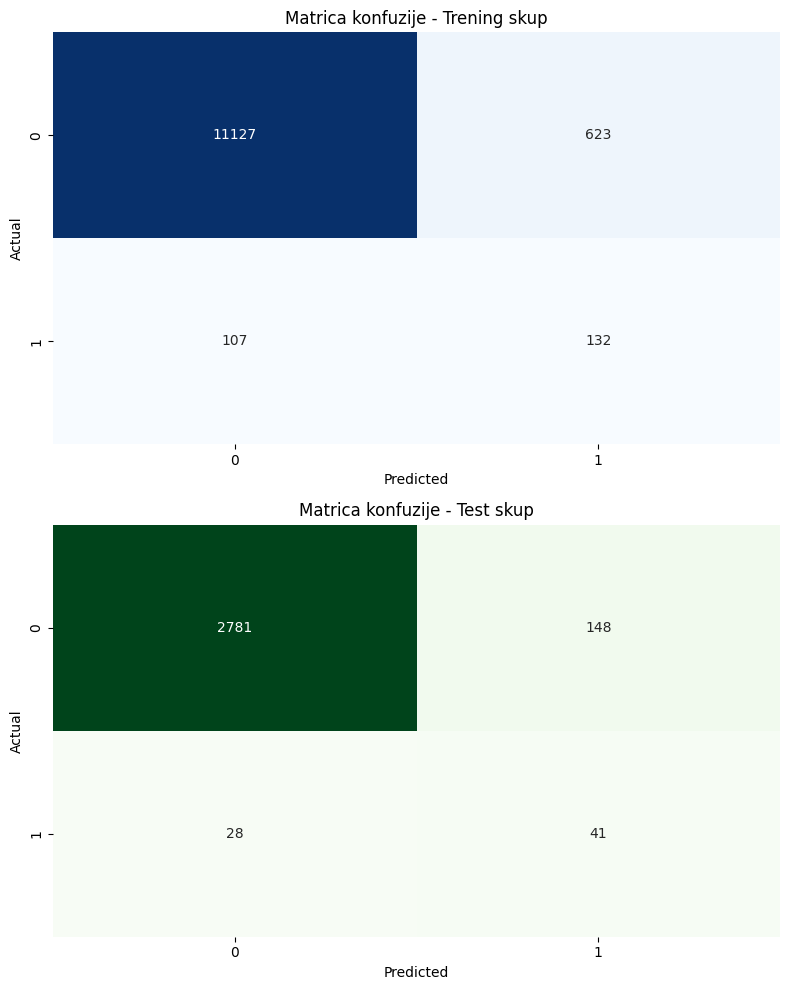

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Izračunavanje matrice konfuzije za trening skup
cm_train = confusion_matrix(y_train, y_train_pred)

# Izračunavanje matrice konfuzije za test skup
cm_test = confusion_matrix(y_test, y_test_pred)

# Plotovanje matrice konfuzije za trening skup
plt.figure(figsize=(8, 10))

plt.subplot(2, 1, 1)
sns.heatmap(cm_train, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.title('Matrica konfuzije - Trening skup')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Plotovanje matrice konfuzije za test skup
plt.subplot(2, 1, 2)
sns.heatmap(cm_test, annot=True, fmt='g', cmap='Greens', cbar=False)
plt.title('Matrica konfuzije - Test skup')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()


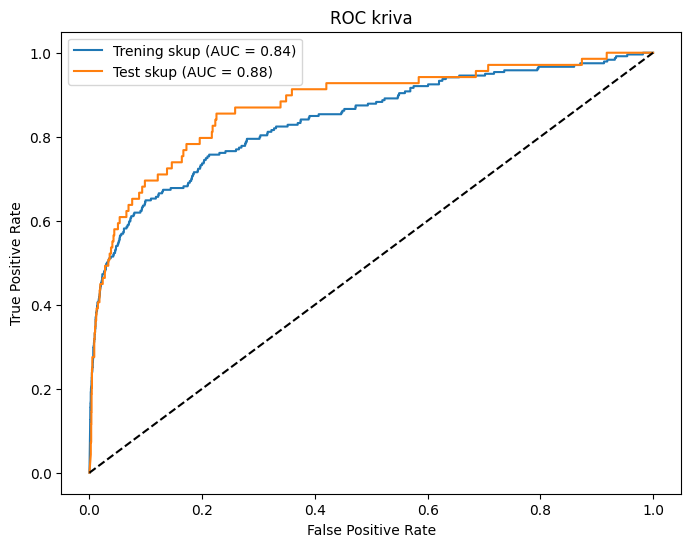

In [3]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Izračunavanje verovatnoća pripadnosti pozitivnoj klasi
y_train_probs = model.predict_proba(X_train)[:, 1]
y_test_probs = model.predict_proba(X_test)[:, 1]

# Izračunavanje vrednosti za ROC krivu
train_fpr, train_tpr, _ = roc_curve(y_train, y_train_probs)
test_fpr, test_tpr, _ = roc_curve(y_test, y_test_probs)

# Izračunavanje AUC vrednosti
train_auc = auc(train_fpr, train_tpr)
test_auc = auc(test_fpr, test_tpr)

# Prikaz ROC krive
plt.figure(figsize=(8, 6))
plt.plot(train_fpr, train_tpr, label='Trening skup (AUC = {:.2f})'.format(train_auc))
plt.plot(test_fpr, test_tpr, label='Test skup (AUC = {:.2f})'.format(test_auc))
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC kriva')
plt.legend()
plt.show()
